# Présentation des données pour une station : station_7005



In [1]:
data_cleaned_7005 <- read.csv("/home/jmaubian/SDD/Projet_stat_meteo/analyses_jo/observations_cleaned_7005.csv", header = TRUE, sep=",", dec=".")

Warning message in file(file, "rt"):
“cannot open file '/home/jmaubian/SDD/Projet_stat_meteo/analyses_jo/observations_cleaned_7005.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
# Dimensions et aperçu
#cat("Dimensions du dataset :", dim(data_cleaned_7005), "\n")
#str(data_cleaned_7005)

In [ ]:
# Sélection des colonnes numériques pertinentes
numeric_vars <- c("Température", "Point.de.rosée","Humidité", "Pression.au.niveau.mer", 
                  "Vitesse.du.vent.moyen.10.mn", "Rafale.sur.les.10.dernières.minutes", 
                  "Précipitations.dans.les.24.dernières.heures")

summary(data_cleaned_7005[, numeric_vars])


  Température    Point.de.rosée     Humidité     Pression.au.niveau.mer
 Min.   :267.9   Min.   :258.6   Min.   :37.00   Min.   : 98930        
 1st Qu.:279.1   1st Qu.:276.9   1st Qu.:71.00   1st Qu.:101295        
 Median :283.7   Median :280.4   Median :83.00   Median :101805        
 Mean   :283.8   Mean   :280.2   Mean   :79.77   Mean   :101740        
 3rd Qu.:288.2   3rd Qu.:284.4   3rd Qu.:91.00   3rd Qu.:102275        
 Max.   :301.2   Max.   :292.1   Max.   :99.00   Max.   :103890        
                                                                       
 Vitesse.du.vent.moyen.10.mn Rafale.sur.les.10.dernières.minutes
 Min.   : 0.000              Min.   : 0.700                     
 1st Qu.: 2.000              1st Qu.: 2.975                     
 Median : 3.300              Median : 4.950                     
 Mean   : 3.595              Mean   : 5.577                     
 3rd Qu.: 4.700              3rd Qu.: 7.200                     
 Max.   :11.600              Max. 


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




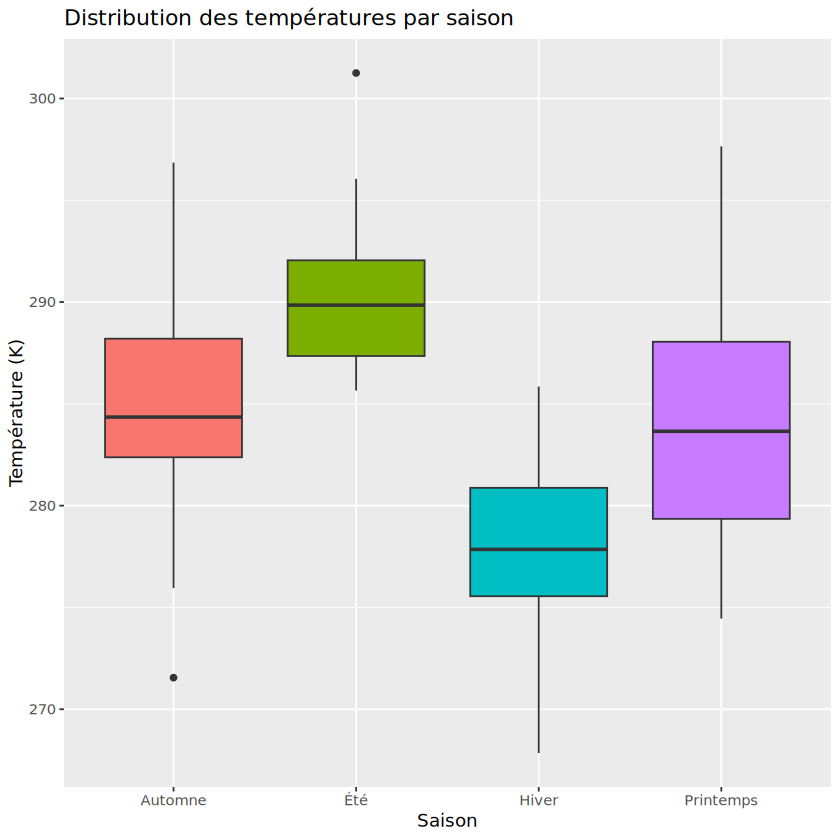

In [ ]:
# Regrouper par mois ou saisons

#install.packages("lubridate")
library(lubridate)
data_cleaned_7005$Date <- as.POSIXct(data_cleaned_7005$Date, format="%Y-%m-%dT%H:%M:%S", tz="Europe/Berlin")
data_cleaned_7005$mois <- month(data_cleaned_7005$Date)
data_cleaned_7005$saison <- ifelse(data_cleaned_7005$mois %in% c(12, 1, 2), "Hiver",
                            ifelse(data_cleaned_7005$mois %in% c(3, 4, 5), "Printemps",
                                   ifelse(data_cleaned_7005$mois %in% c(6, 7, 8), "Été", "Automne")))

# Boxplot Température par saison
ggplot(data_cleaned_7005, aes(x=saison, y=Température, fill=saison)) + geom_boxplot() +
ggtitle("Distribution des températures par saison") +
xlab("Saison") + ylab("Température (K)") +
theme(legend.position="none")

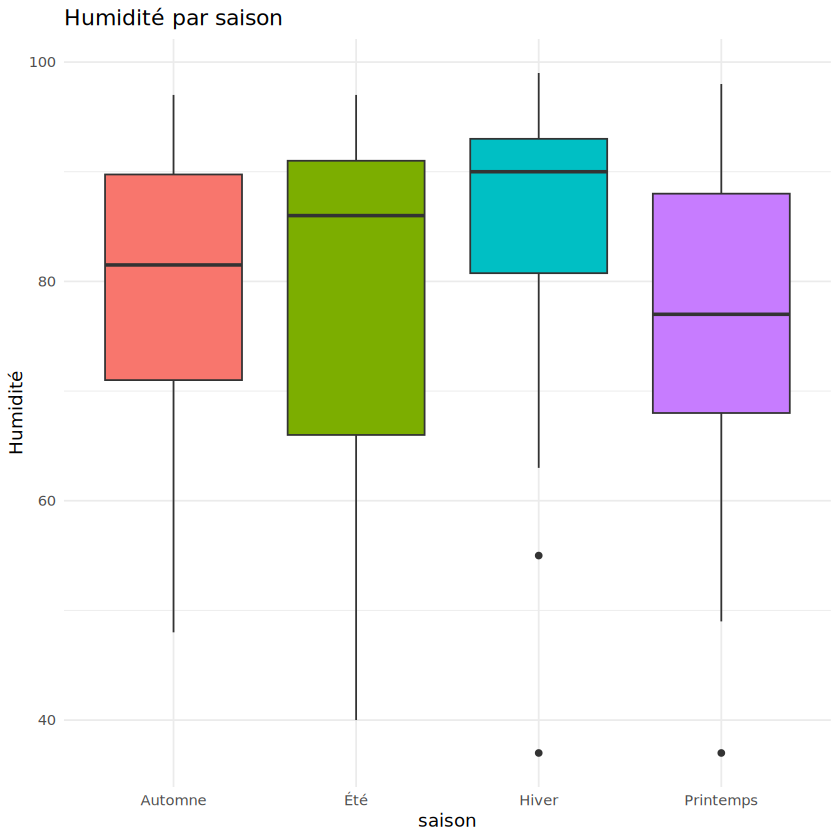

In [ ]:
# Humidité par saison
ggplot(data_cleaned_7005, aes(x=saison, y=Humidité, fill=saison)) +
  geom_boxplot() +
  ggtitle("Humidité par saison") +
  theme_minimal() +
  theme(legend.position="none")


Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


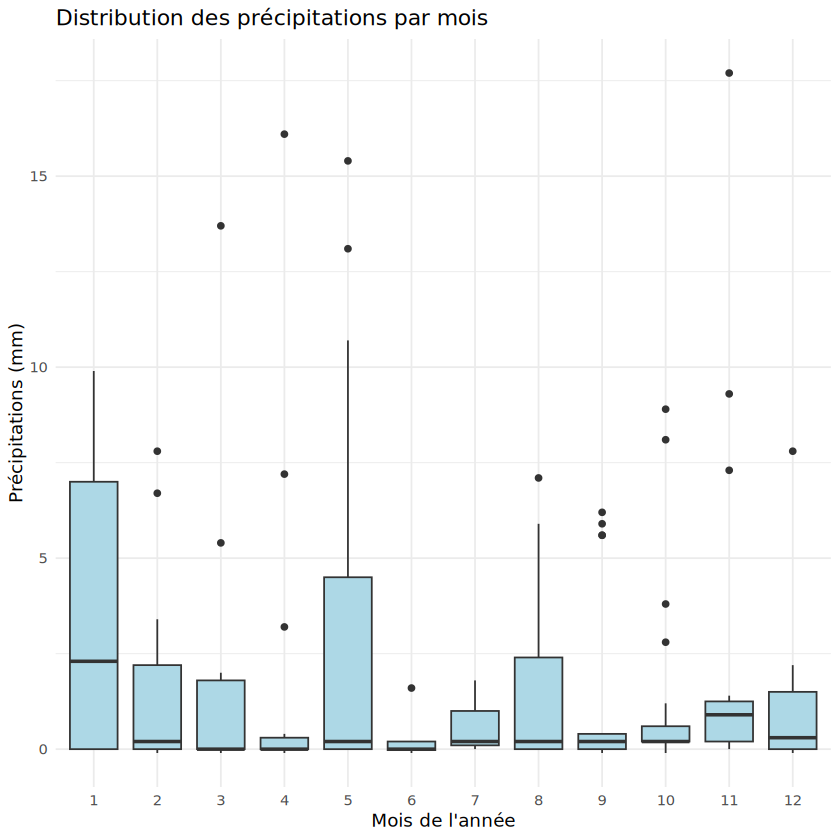

In [ ]:
library(ggplot2)

ggplot(data_cleaned_7005, aes(x = factor(mois), y = Précipitations.dans.les.24.dernières.heures)) +
  geom_boxplot(fill="lightblue") +
  xlab("Mois de l'année") +
  ylab("Précipitations (mm)") +
  ggtitle("Distribution des précipitations par mois") +
  theme_minimal()


In [ ]:
# Saisons déjà présentes : data_cleaned_7005$saison
table(data_cleaned_7005$saison)  # Vérifier les observations par saison


< table of extent 0 >

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


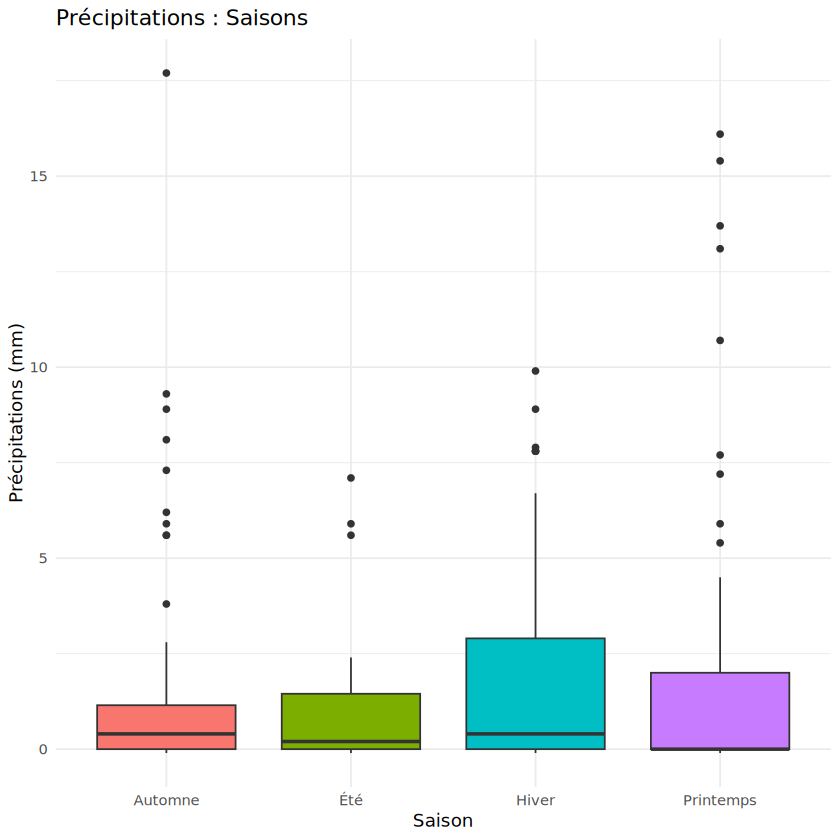

In [ ]:
precip_saison <- subset(data_cleaned_7005, saison %in% c("Hiver", "Printemps", "Été", "Automne"))

library(ggplot2)

ggplot(precip_saison, aes(x = saison, y = Précipitations.dans.les.24.dernières.heures, fill=saison)) +
  geom_boxplot() +
  ylab("Précipitations (mm)") +
  xlab("Saison") +
  ggtitle("Précipitations : Saisons") +
  theme_minimal() +
  theme(legend.position="none")



# A tibble: 4 × 2
  saison    nb_obs
  <chr>      <int>
1 Automne       54
2 Hiver         44
3 Printemps     49
4 Été           29


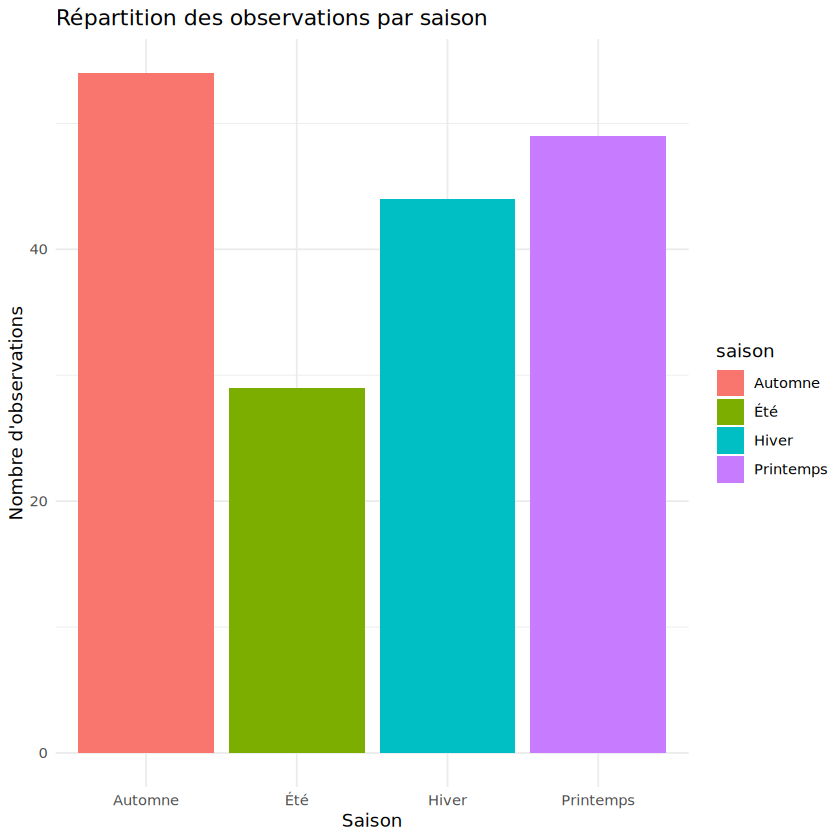

In [ ]:
# Regrouper par mois ou saisons

#install.packages("lubridate")
library(lubridate)
data_cleaned_7005$Date <- as.POSIXct(data_cleaned_7005$Date, format="%Y-%m-%dT%H:%M:%S", tz="Europe/Berlin")
data_cleaned_7005$mois <- month(data_cleaned_7005$Date)
data_cleaned_7005$saison <- ifelse(data_cleaned_7005$mois %in% c(12, 1, 2), "Hiver",
                            ifelse(data_cleaned_7005$mois %in% c(3, 4, 5), "Printemps",
                                   ifelse(data_cleaned_7005$mois %in% c(6, 7, 8), "Été", "Automne")))


library(dplyr)

# Nombre d'observations par saison
saison_counts <- data_cleaned_7005 %>%
    group_by(saison) %>%
    summarize(nb_obs = n())
print(saison_counts)

ggplot(saison_counts, aes(x = saison, y = nb_obs, fill = saison)) +
  geom_col() +
  labs(title = "Répartition des observations par saison",
       x = "Saison", y = "Nombre d'observations") +
  theme_minimal()

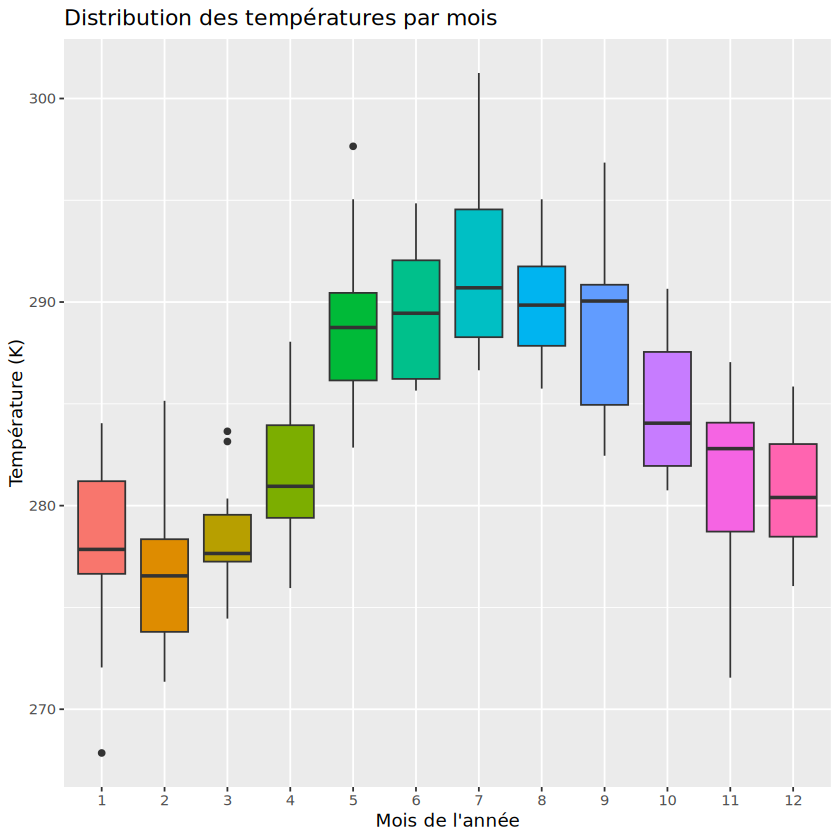

In [ ]:
ggplot(data_cleaned_7005, aes(x = factor(mois), y = Température, fill = factor(mois))) +
  geom_boxplot() +
  ggtitle("Distribution des températures par mois") +
  xlab("Mois de l'année") + ylab("Température (K)") +
  theme(legend.position="none")